In [3]:
from typing import Any

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def plot_graph(G):
    options = dict(
        font_size = 12,
        node_size = 500,
        node_color = "white",
        edge_color = "black",
    )
    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos, **options)
    
    if nx.is_weighted(G):
        labels = {e: G.edges[e]["weight"] for e in G.edges}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

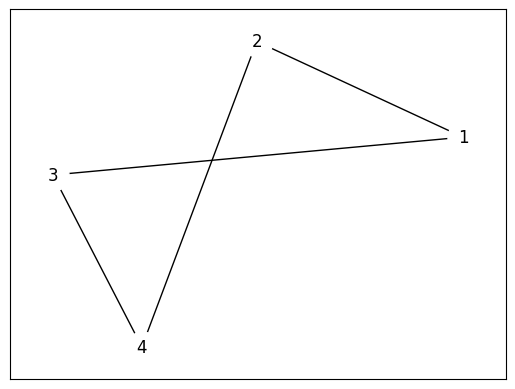

In [5]:
G = nx.Graph()
edges =  [
    (1, 2),
    (1, 3),
    (2, 4),
    (3, 4)
]
G.add_edges_from(edges)
plot_graph(G)

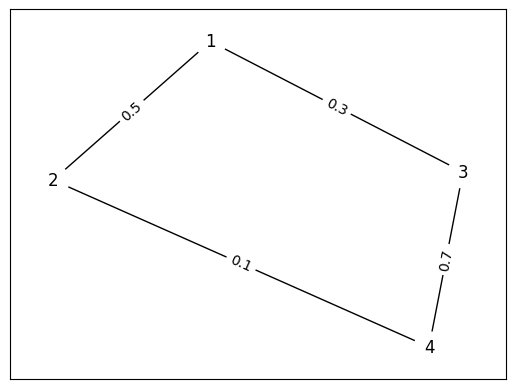

In [10]:
G = nx.Graph()
edges = [
    (1, 2, 0.5),
    (1, 3, 0.3),
    (2, 4, 0.1),
    (3, 4, 0.7),
]
G.add_weighted_edges_from(edges)
plot_graph(G)

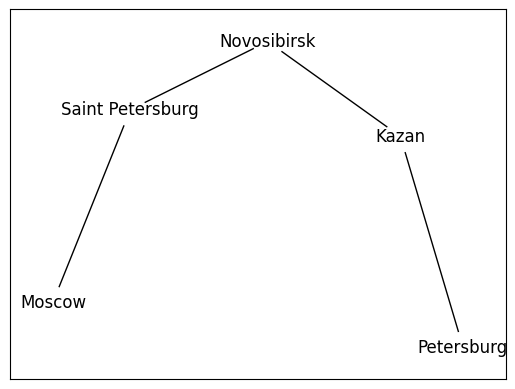

In [22]:
G = nx.Graph()
G.add_nodes_from([
    ("Moscow", dict(population=13.1)),
    ("Saint Petersburg", dict(population=5.6)),
    ("Kazan", dict(population=1.3)),
    ("Novosibirsk", dict(population=1.6))
])

G.add_edge("Moscow", "Saint Petersburg", distance=20)
G.add_edge("Petersburg", "Kazan", distance=100)
G.add_edge("Kazan", "Novosibirsk", distance=100)
G.add_edge("Novosibirsk", "Saint Petersburg", distance=2200)

plot_graph(G)



In [16]:
len(G)


5

In [17]:
len(G.edges)

4

In [18]:
for i in G.edges:
    print(i)

('Moscow', 'Saint Petersburg')
('Saint Petersburg', 'Novosibirsk')
('Kazan', 'Petersburg')
('Kazan', 'Novosibirsk')


In [19]:
G.has_edge("Moscow", "Novosibirsk")

False

In [23]:
for e in G.edges.data("distance"):
    print(e)

('Moscow', 'Saint Petersburg', 20)
('Saint Petersburg', 'Novosibirsk', 2200)
('Kazan', 'Petersburg', 100)
('Kazan', 'Novosibirsk', 100)


In [24]:
for n in G.neighbors("Moscow"):
    print(n)

Saint Petersburg


In [26]:
G = nx.Graph()
edges = [
    (1, 2, 0.5),
    (1, 3, 0.3),
    (2, 4, 0.1),
    (3, 4, 0.7),
]
G.add_weighted_edges_from(edges)
nx.write_adjlist(G, "test.adjlist")

In [27]:
nx.write_edgelist(G, "test.edgelist")

In [29]:
G_1 = nx.read_adjlist("test.adjlist")
G_2 = nx.read_edgelist("test.edgelist")

In [31]:
G_1
G_2

In [43]:
def avg_neigh_degree(G) -> dict[Any, Any]:
    data = {}
    for n in G.nodes():
        if G.degree(n):
            data[n] = np.mean([G.degree(i) for i in G[n]])
    return data
    #nx.average_neighbor_degree(G)

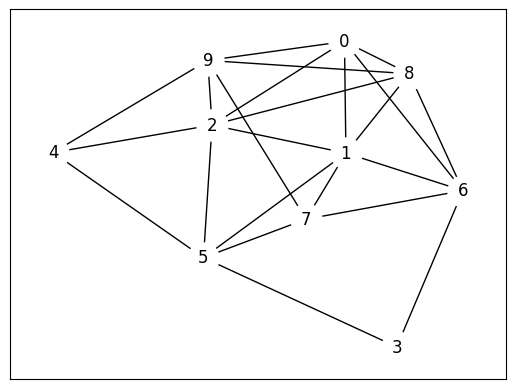

In [50]:
G = nx.erdos_renyi_graph(n=10, p=0.5)
plot_graph(G)

In [47]:
print(avg_neigh_degree(G))

{0: 2.0, 1: 2.0, 2: 2.5, 3: 2.6666666666666665, 4: 4.0, 5: 1.5, 6: 4.0, 7: 4.0, 8: 1.5, 9: 2.0}


In [62]:
import matplotlib.pyplot as plt

def estimate_connectivity_probability(n, p, n_trials):
    is_connected = np.zeros((n_trials,), dtype=np.int_)
    for i in range(n_trials):
        G = nx.erdos_renyi_graph(n=n, p=p)
        is_connected[i] = nx.is_connected(G)
    return np.mean(is_connected)

In [66]:
def plot_percolation_curve(n):
    p = np.linspace(0,1,20)
    connectivity_probabilities = np.zeros_like(p, dtype=np.float_)
    n_trials = 1000
    for i in range(len(p)):
        connectivity_probabilities[i] = estimate_connectivity_probability(
            n=n,
            p=p[i],
            n_trials=n_trials
        )
    fig, ax = plt.subplots(1, 1, figsize =(6, 4))
    ax.plot(p, connectivity_probabilities, "o--")
    ax.set_xlabel(r"$p$", fontsize=12)
    ax.set_ylabel(r"$p_{perc}$", fontsize=12)
    fig.tight_layout()
    plt.show()
        

In [71]:
plot_percolation_curve(n=1000)